**Exploratory Data Analysis**
---

In [3]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from lets_plot import *
LetsPlot.setup_html()

In [135]:
data = 'Data/final_modeling.csv'

In [136]:
df = pd.read_csv(data)

In [59]:
df.shape

(106657, 13)

In [137]:
df.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color
0,15000,2013.0,ford,others,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,truck,black
1,27990,2012.0,gmc,others,good,8 cylinders,gas,68696.0,clean,other,4wd,truck,black
2,34590,2016.0,chevrolet,others,good,6 cylinders,gas,29499.0,clean,other,4wd,truck,silver
3,35000,2019.0,toyota,tacoma,excellent,6 cylinders,gas,43000.0,clean,automatic,4wd,truck,grey
4,29990,2016.0,chevrolet,others,good,6 cylinders,gas,17302.0,clean,other,4wd,truck,red


In [138]:
# replace pickup with truck in type column
df['type'] = df['type'].replace('pickup', 'truck')

In [139]:
# add age column
df['age'] = 2021 - df['year']

# Exploratory Data Analysis questions. 

**Cars**

`1. What is the veichle distribution by year?`\
`2. What is the veichle distribution by make?`\
`3. compare prices by make and year`

**Manufucturers**
1. What is the manufucturer distribution by year?
2. What are the top 10 manufucturers? 
3. What are the top 10 models? 
4. Best paint colors? 
5. Compare conditions by paint colors? 

7. car type by condition

**Hypothesis**
1. Does the price of a car depend on the condition?
2. Does the price of a car depend on the paint color?
3. Does the price of a car depend on the type of car?
4. Does the price of a car depend on the manufacturer?
5. Does the price of a car depend on the model?
6. Does the price of a car depend on the year?
7. Does the price of a car depend on the odometer?


**1. Cars - Year, Make, Model**

`1. What is the veichle distribution by year?`\
`2. What is the veichle distribution by make?`\
`3. compare prices by make and year`


Age, Mileage, Make, Model

In [342]:
# density distribution of cars by make using lets-plot over the years
ggplot(df, aes(x='age', color='manufacturer')) + \
    geom_density(fill = 'black', size = 1) + \
        theme(axis_line_y  = 'blank') + \
        theme(axis_text_y  = 'black') + \
        theme(axis_ticks_y = 'blank') + \
        ggsize(800, 400) + theme_classic() + \
            flavor_high_contrast_dark()

In [180]:
# select df where age is = 5 and model not equal others 
df_5 = df[(df['age'] <= 30) & (df['model'] != 'others')& (df['manufacturer'] != 'others')].sort_values(by='age', ascending=False)

In [394]:
# bar plot of cars by make at age 5 stack by model using lets-plot
ggplot(df_5, aes(x='manufacturer', fill='type')) +\
    geom_bar(show_legend=False) + \
        scale_fill_brewer(type='qual', palette='Paired') + \
        ggsize(800, 400) + \
        theme_classic() + \
            flavor_high_contrast_dark()

In [400]:
# scatter plot of price versus type using lets-plot
ggplot(df_5, aes(x='price', y='type', color='type')) + \
    geom_point(size = 5, show_legend=False) + \
        ggsize(800, 400) + \
        theme_classic() + \
            flavor_high_contrast_dark()


`marketplace is dominated by Trucks and SUVs`

In [72]:
# create bins for prices
bins = [0, 5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 50000, 60000]

# create column for price bins if price falls within the bin range, record bin value
df['price_bins'] = pd.cut(df['price'], bins, labels=False)

In [348]:
# create pivot table for mean prices by make and age
df_pivot = pd.pivot_table(df, index=['manufacturer', 'age'], values='price', aggfunc=np.mean).reset_index()
df_pivot.head()

,manufacturer,age,price
0,acura,2.0,35341.945455
1,acura,3.0,27588.496296
2,acura,4.0,25885.235294
3,acura,5.0,22000.358974
4,acura,6.0,18804.250000


In [355]:
df_pivot.manufacturer.unique()

array(['acura', 'audi', 'bmw', 'cadillac', 'chevrolet', 'chrysler',
       'dodge', 'ford', 'gmc', 'honda', 'hyundai', 'jeep', 'kia', 'lexus',
       'mercedes-benz', 'nissan', 'others', 'ram', 'subaru', 'toyota',
       'volkswagen'], dtype=object)

In [356]:
# add origin column to df_pivot based on manufacturer value. toyoya and honda are japanese, ford and chevrolet are american, hyundai and kia are korean, volkswagen and bmw are german
df_pivot['origin'] = np.where(df_pivot['manufacturer'].isin(['toyota', 'honda', 'acura', 'lexus', 'nissan', 'subaru']), 'japanese',\
    np.where(df_pivot['manufacturer'].isin(['ford', 'chevrolet', 'cadillac', 'chrysler', 'dodge', 'gmc', 'jeep', 'ram' ]), 'american',\
        np.where(df_pivot['manufacturer'].isin(['hyundai', 'kia']), 'korean',\
            np.where(df_pivot['manufacturer'].isin(['volkswagen', 'bmw', 'audi', 'mercedes-benz']), 'german', 'others'))))


In [836]:
# line plot of price by year by manufacturer
ggplot(df_pivot, aes(x='age', y='price', color='origin')) +\
    geom_point(alpha = 1, size =4, stroke = 0.001) + \
        theme_classic() + flavor_high_contrast_dark() + \
            theme(axis_text_y = element_text(size = 15)) + \
                theme(axis_text_x = element_text(size = 15)) + \
                        theme(axis_line_y = element_line(color = 'black', size = 1)) + ylim(0, 50000) +\
                            ggsize(900, 500) + scale_y_continuous(name='', breaks=[10000, 20000, 30000, 40000, 50000]) + theme(legend_position='bottom')

` As age of the car increases, the price decreases. ` `Until about 30 years, then the price increases.`
`American cars are the most expensive, the least expensive are cars of korean origin.`

In [389]:
# line plot of price by year by manufacturer
ggplot(df_pivot, aes(x='age', y='price', color='origin')) +\
    geom_density(alpha = 0.8, size =1, stroke = 1) + ggsize(800, 400) + \
        theme_classic() + flavor_high_contrast_dark()

In [101]:
# violin plot of price by condition using lets-plot
ggplot(df, aes(x='condition', y='price', fill='..quantile..')) + geom_violin(quantiles=[.02, .25, .5, .75, .98], quantile_lines=True) + ggsize(800, 400) + theme_classic() + flavor_high_contrast_dark()

In [108]:
from lets_plot.bistro.joint import *
LetsPlot.setup_html()

In [843]:
# line plot of price by year by manufacturer
joint_plot(df, x='odometer', y='price', geom='density2d', size = 1, color = '#07f5cd') + \
   theme_classic() + flavor_high_contrast_dark() +\
        theme(axis_text_y = element_text(size = 15)) + \
                theme(axis_text_x = element_text(size = 15)) + \
                        theme(axis_line_y = element_line(color = 'black', size = 1)) + ylim(0, 50000) +\
                            ggsize(800, 400) + scale_y_continuous(name='', breaks=[10000, 30000, 50000])

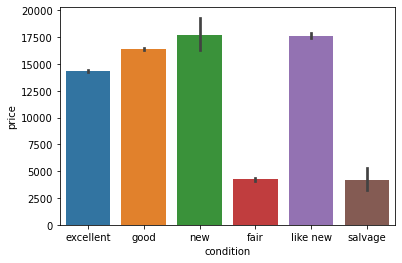

In [83]:
ax = sns.barplot(x="condition", y="price", data=df)

`Cars that are like new have the highest price`

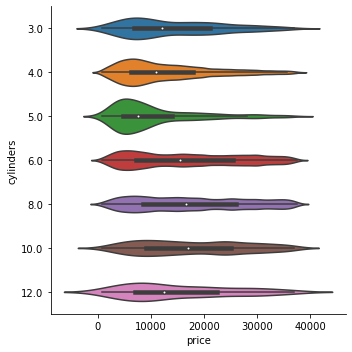

In [8]:
sns.catplot(y="cylinders", x="price",kind = "violin", data=df)

In [134]:
# violin plot of cylinder by price using lets-plot
ggplot(df, aes(x='cylinders', y='price', fill='..quantile..')) + geom_violin(quantiles=[.25, .5, .75], quantile_lines=True) + ggsize(800, 400) + theme_classic() + flavor_high_contrast_dark()

Text(0, 0.5, 'price')

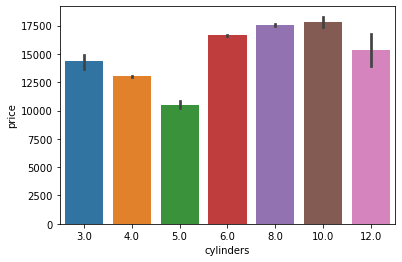

In [9]:
# bar plot of cylinders vs price
ax = sns.barplot(x="cylinders", y="price", data=df)
ax.set_xlabel("cylinders")
ax.set_ylabel("price")

` The higer the cylinders, the higher the price`

In [769]:
x = df['cylinders']
y1 = df['price']
y2 = df['price']
p = ggplot({'x': x, 'y1': y1, 'y2': y2}) + \
    geom_violin(aes('x', 'y1'), show_half=-1, \
                trim=False, fill='#f78c20', quantiles=[.5], quantile_lines=True) + \
    geom_violin(aes('x', 'y2'), show_half=1, \
                trim=False, fill='#04d4a3', quantiles=[.5], quantile_lines=True) + \
                theme_classic() + flavor_high_contrast_dark() + \
                    labs(x='Cylinders', y='Price') + \
                        theme(axis_text_y = element_text(size = 15)) + \
                        theme(axis_line_y = element_line(color = 'black', size = 1)) + ylim(0, 70000) +\
                            ggsize(800, 400) + scale_y_continuous(name='', breaks=[5000, 25000, 50000, 70000]) + \
                                labs(x='Cylinders', y='')

                        

In [770]:
p

In [493]:
#group df by cylinders and year and get mean price
cylinders = df.groupby(['cylinders', 'year']).mean().reset_index()
cylinders.head()

,cylinders,year,price,odometer,age
0,10 cylinders,1968.0,28000.0,80000.0,53.0
1,10 cylinders,1977.0,12000.0,100000.0,44.0
2,10 cylinders,1994.0,26700.0,66030.0,27.0
3,10 cylinders,1995.0,5000.0,166000.0,26.0
4,10 cylinders,1996.0,7625.0,84963.0,25.0


In [518]:
# lineplot of cylinders vs price by year using ggplot
ggplot(df, aes(x='age', y='price', color='cylinders')) +\
    geom_point(alpha = 1, size =2, stroke = 1, stat = 'count') + ggsize(800, 400) + \
        theme_classic() + flavor_high_contrast_dark()

NameError: name 'pd' is not defined

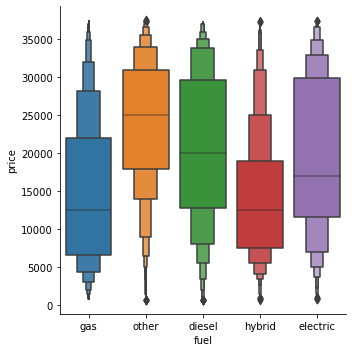

In [10]:
sns.catplot(x="fuel", y="price", kind="boxen",
            data=df)

`The price breakdown are as follows:`
- `Most gas cars are priced between 7 and 22,000`
- `Most diesel cars are priced between 13 and 30,000`
- `Most electric cars are priced between 12 and 30,000`
- `Most hybrid cars are priced between 8 and 18,000`
- `Other between 18 and 31,000`

In [740]:
p = ggplot(df, aes(x='fuel', y='price', fill='fuel')) + geom_boxplot(fatten=5, show_legend = False, outlier_color = 'white', outlier_size = 0.25) + \
    ggsize(400, 400) + \
        theme_classic() + \
            flavor_high_contrast_dark() + \
                theme(axis_text_x = element_text(angle = 0, hjust = 1, size = 15))+ \
                    theme(axis_text_y = element_text(size = 15)) + \
                        theme(axis_line_y = element_line(color = 'black', size = 1)) + \
                             scale_y_continuous(name='', breaks=[5000, 15000, 25000, 35000, 45000]) + \
                                labs(x='', y='')

In [741]:
p

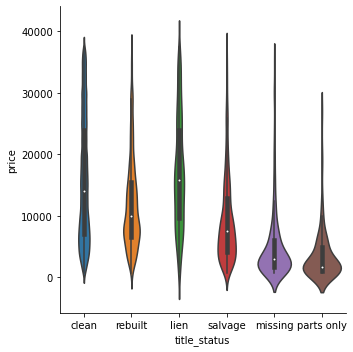

In [11]:
sns.catplot(x="title_status", y="price",kind="violin", data=df)

`Missing and Parts Only cars are priced cheaper than the rest`

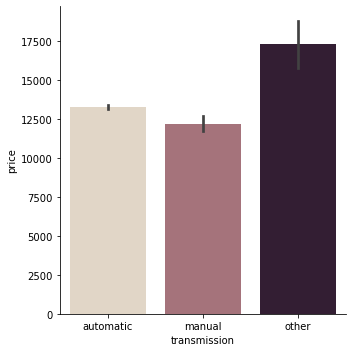

In [346]:
sns.catplot(x="transmission", y="price",kind="bar", palette="ch:.25", data=df_5)

In [744]:
p = ggplot(df, aes(x='transmission', y='price', fill='transmission')) + geom_boxplot(fatten=5, show_legend = False, outlier_color = 'white', outlier_size = 0.25) + \
    ggsize(400, 400) + \
        theme_classic() + \
            flavor_high_contrast_dark() + \
                theme(axis_text_x = element_text(angle = 0, hjust = 1, size = 15))+ \
                    theme(axis_text_y = element_text(size = 15)) + \
                        theme(axis_line_y = element_line(color = 'black', size = 1)) + \
                             scale_y_continuous(name='', breaks=[5000, 15000, 25000, 35000, 45000]) + \
                                labs(x='Transmission', y='')

In [745]:
p

In [581]:
# line plot of count of cars by year by transmission using ggplot2

p = ggplot(df, aes(x='transmission', y='..count..', fill = '..count..')) +\
    geom_bar(size = 3, stat = 'count', show_legend = False) +\
        scale_y_continuous(breaks=list(range(0, 100000, 30000))) +\
            ggsize(400, 400) + \
                theme_classic() + flavor_high_contrast_dark()+ \
                    theme(axis_line_y='blank') + \
                        scale_fill_discrete()
ggsave(plot = p, filename = 'transmission.png', path = 'Images')
                            

'/Users/patrickokwir/Desktop/Capstone---Predicting-market-value-of-used-cars/Images/transmission.png'

In [ ]:
geom_pie(aes(fill=as_discrete('name', order_by='..count..'), weight='value'), \
                        size=15, hole=0.2, stroke=1.0, \
                        labels=layer_labels(['..proppct..']).format('..proppct..', '{.1f}%'))

In [587]:
from lets_plot.mapping import *

In [613]:
ggplot(df) + geom_pie(aes(fill=as_discrete('fuel', order_by='..count..'), weight='..count..'), \
                        size=28, hole=0.2, stroke=1.0, \
                        labels=layer_labels(['..proppct..']).format('..proppct..', '{.1f}%')) +\
                        ggsize(400, 400) + \
                        theme_classic() + flavor_high_contrast_dark()+ scale_fill_viridis(option='A') +\
                        theme(axis_line_y='blank', axis_line_x='blank', axis_text_y='blank', axis_text_x='blank', axis_ticks='blank', axis_title='blank', legend_position='bottom')
# ggsave(plot = p, filename = 'transmission.png', path = 'Images')
                            

`Automatic cars are priced higher than manual cars`

In [628]:
import copy

In [632]:
df_c = copy.deepcopy(df)

In [633]:
# combine 6 cyclinders and 4 cylinders
df_c['cylinders'] = np.where(df_c['cylinders'].isin(['6 cylinders', '4 cylinders']), '6 | 4 cylinders', df_c['cylinders'])

In [634]:
ggplot(df_c) + geom_pie(aes(fill=as_discrete('cylinders', order_by='..count..'), weight='..count..'), \
                        size=28, hole=0.2, stroke=1.0,  \
                        labels=layer_labels(['..proppct..']).format('..proppct..', '{.1f}%')) +\
                        ggsize(400, 400) +  scale_shape(guide=guide_legend(nrow=2))+\
                        theme_classic() + flavor_high_contrast_dark()+ scale_fill_viridis(option='A') +\
                        theme(axis_line_y='blank', axis_line_x='blank', axis_text_y='blank', axis_text_x='blank', axis_ticks='blank', axis_title='blank', legend_position='bottom')
# ggsave(plot = p, filename = 'transmission.png', path = 'Images')
                            

<Axes: xlabel='drive', ylabel='price'>

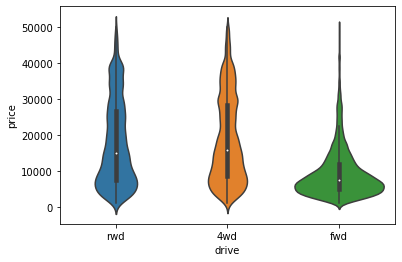

In [447]:
sns.violinplot(x=df.drive, y=df.price)

In [753]:
x = df['drive']
y1 = df['price']
y2 = df['price']
p = ggplot({'x': x, 'y1': y1, 'y2': y2}) + \
    geom_violin(aes('x', 'y1'), show_half=-1, \
                trim=False, fill='#f57e07', quantiles=[.5], quantile_lines=True) + \
    geom_violin(aes('x', 'y2'), show_half=1, \
                trim=False, fill='#04d4a3', quantiles=[.5], quantile_lines=True) + \
                theme_classic() + flavor_high_contrast_dark() + \
                    labs(x='Drivetrain', y='Price') + \
                        theme(axis_text_y = element_text(size = 15)) + \
                        theme(axis_line_y = element_line(color = 'black', size = 1)) + \
                            ggsize(400, 400) + scale_y_continuous(name='', breaks=[10000, 30000, 50000])
p
# save plot
# ggsave(plot = p, filename = 'Violin_Drive_Train.png', path = 'Images')

In [551]:
# bar plot of drive stat = 'count'
p = ggplot(df, aes(x='drive', fill='..count..')) +\
    geom_bar(stat = 'count', show_legend = False)+\
        scale_y_continuous(breaks=list(range(0, 50000, 45000))) +\
            scale_fill_discrete() +\
        ggsize(400, 400) + \
                        theme() + \
                            theme_classic() + flavor_high_contrast_dark()+ \
                            theme(axis_line_y='blank')
ggsave(plot = p, filename = 'Bar_Drive_Train.png', path = 'Images')

'/Users/patrickokwir/Desktop/Capstone---Predicting-market-value-of-used-cars/Images/Bar_Drive_Train.png'

`4WD and RWD cars are priced higher than FWD cars`

In [446]:
p = ggplot(df, aes(x='type', y='price', fill='type')) + geom_boxplot(show_legend = False) + ylim(1000, 35000, 35000) + \
    ggsize(800, 600) + \
        theme_classic() + \
            flavor_high_contrast_dark() + \
                theme(axis_text_x = element_text(angle = 90, hjust = 1, size = 15))+ \
                    theme(axis_text_y = element_text(size = 15)) + \
                        theme(axis_line_y = element_line(color = 'black', size = 1))

# save plot to file
ggsave(plot = p, filename = 'boxplot_car_types.png', path = 'Images')

'/Users/patrickokwir/Desktop/Capstone---Predicting-market-value-of-used-cars/Images/boxplot_car_types.png'

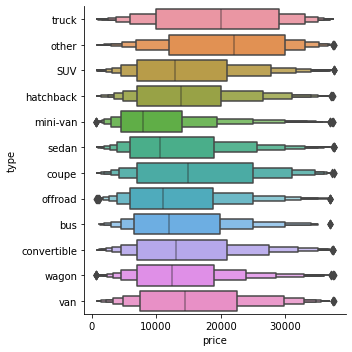

In [16]:
sns.catplot(y="type", x="price",kind="boxen", data=df);

`Trucks are priced higher than cars`

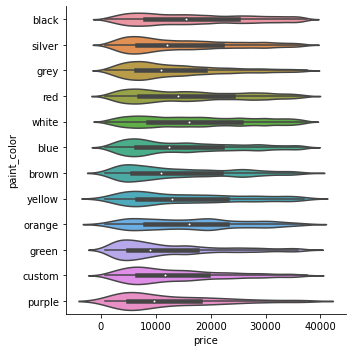

In [17]:
sns.catplot(y="paint_color", x="price",kind="violin", data=df);

`non-traditional factory colors are priced higher than traditional colors`

In [443]:
# catplot of price by manufacturer using lets-plot
p = ggplot(df, aes(x='manufacturer', y='price', fill='manufacturer')) + geom_boxplot(show_legend = False) + ylim(1000, 35000, 35000) + \
    ggsize(800, 600) + \
        theme_classic() + \
            flavor_high_contrast_dark() + \
                theme(axis_text_x = element_text(angle = 90, hjust = 1, size = 15))+ \
                    theme(axis_text_y = element_text(size = 15)) + \
                        theme(axis_line_y = element_line(color = 'black', size = 1))

# save plot to file
ggsave(plot = p, filename = 'price_by_manufacturer.png', path = 'Images')

'/Users/patrickokwir/Desktop/Capstone---Predicting-market-value-of-used-cars/Images/price_by_manufacturer.png'

` market is dominated by Ram, Jeep, GMC, Lexus. Most non-domestic cars struggle to find marketshare with the exception of Toyota, Lexus, Acura which are manufactured by Toyota`

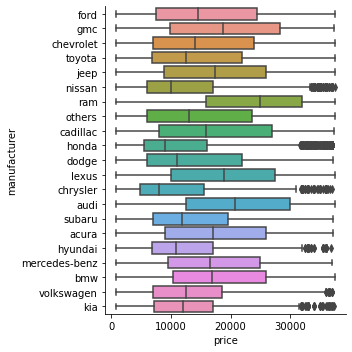

In [18]:
sns.catplot(y="manufacturer", x="price",kind="box", data=df);

`RAM, Audi, and BMW are the most expensive brands`

In [208]:
data = 'Data/feature_importances.csv'

In [234]:
fi = pd.read_csv(data)

In [237]:
# rename columns
fi.columns = ['Feature', 'Importance']

In [238]:
fi.head()

,Feature,Importance
0,age,0.373556
1,odometer,0.212519
2,cylinders,0.179514
3,fuel,0.051761
4,drive,0.040156


In [821]:
# bar plot of feature importance using lets-plot

ggplot(fi, aes(x='Feature', y='Importance', color = 'Feature')) + \
    geom_lollipop(stat='identity',show_legend=False, size = 3, stroke = 5, linewidth=0.5, linetype = 1, position = 'dodge') + \
    ggsize(900, 500) + \
        theme_classic() + scale_color_continuous(low='white', high='red') +\
            theme(axis_line_x  = element_text(angle = 90, hjust = 1)) + \
                theme(axis_line_y  = element_line(color = 'black')) + \
                    theme(axis_text_y  = element_text(color = 'white')) + \
                        theme(axis_text_x  = element_text(angle = 90)) + \
                        theme(axis_ticks_y = 'blank') + scale_y_continuous(name='Importance', breaks=[0.05, 0.15, 0.25, 0.37]) + ylim(-0.02, 0.375) +\
            flavor_high_contrast_dark()

In [ ]:
axis_line_y = 'blank', , axis_text_y = 'blank'

In [230]:
fi.reset_index

<bound method DataFrame.reset_index of               Importance
Feature                 
age             0.373556
odometer        0.212519
cylinders       0.179514
fuel            0.051761
drive           0.040156
manufacturer    0.034022
type            0.031913
transmission    0.022643
paint_color     0.019821
condition       0.017210
model           0.011796
title_status    0.005090>

In [62]:
df.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
0,others,15000,2013.0,ford,others,excellent,6.0C,gas,128000.0,clean,automatic,rwd,truck,black,al
1,others,27990,2012.0,gmc,others,good,8.0C,gas,68696.0,clean,other,4wd,truck,black,al
2,others,34590,2016.0,chevrolet,others,good,6.0C,gas,29499.0,clean,other,4wd,truck,silver,al
3,others,35000,2019.0,toyota,tacoma,excellent,6.0C,gas,43000.0,clean,automatic,4wd,truck,grey,al
4,others,29990,2016.0,chevrolet,others,good,6.0C,gas,17302.0,clean,other,4wd,truck,red,al


In [63]:
# drop region column
df.drop('region', axis=1, inplace=True)

In [64]:
df.drop('state', axis=1, inplace=True)

In [65]:
df.columns

Index(['price', 'year', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'type',
       'paint_color'],
      dtype='object')

In [21]:
from sklearn import preprocessing
import pandas as pd
le = preprocessing.LabelEncoder()

In [23]:
df[['price', 'year', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'drive', 'type', 'paint_color']]=df[['price', 'year', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'drive', 'type', 'paint_color']].apply(le.fit_transform)

In [66]:
df.columns

Index(['price', 'year', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'type',
       'paint_color'],
      dtype='object')

In [25]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn import metrics
from sklearn.metrics import mean_squared_error as MSE

In [67]:
# sample 10000 rows
df = df.sample(n=300000, random_state=1, replace=True)

In [68]:
y= df.price
X= df.drop('price', axis=1)

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(240000, 12) (240000,)
(60000, 12) (60000,)


In [40]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_pred),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2))
print(regressor.score(X_test,y_test)*100)

Mean Absolute Error: 143.14
Mean Squared Error: 226331.34
Root Mean Squared Error: 475.74
98.04059888005612


In [71]:
# Random Forest Regression with encoding and scaling 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

onehot = OneHotEncoder(handle_unknown='ignore')
scaler = StandardScaler(scaler='zscore')




In [41]:
# get feature importance
feature_imp = pd.Series(regressor.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp

year            0.448848
odometer        0.193634
cylinders       0.068002
manufacturer    0.067743
type            0.050128
fuel            0.049415
model           0.035552
drive           0.033701
paint_color     0.029704
condition       0.023273
dtype: float64

In [111]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# import the regressors
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

# import the metrics
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_log_error as MSLE
from sklearn.metrics import mean_absolute_percentage_error as MAPE
from sklearn.metrics import median_absolute_error as MAD


In [69]:
import xgboost as xgb
from xgboost import XGBRegressor

model = XGBRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print (model.score(X_test, y_test)*100)


90.11316314957702


In [44]:
kfold = KFold(n_splits=10)
scoring = 'neg_mean_squared_error'

In [70]:
# build a pipeline
models = []
models.append(('XGB', XGBRegressor()))
models.append(('RF', RandomForestRegressor()))
models.append(('GB', GradientBoostingRegressor()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVM', SVR()))
models.append(('LR', LinearRegression()))

# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, np.sqrt(-cv_results.mean()), cv_results.std())
    print(msg)

XGB: 3093.556214 (350431.502449)
RF: 252.230744 (16750.150342)
GB: 5321.034582 (555795.289088)
KNN: 1443.927253 (235944.946086)
CART: 175.315137 (33932.820163)


In [46]:
# Ridge Regression
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=100)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
print (ridge.score(X_test, y_test)*100)

47.52988621578474


In [54]:
# hyperparameter tuning lamda for ridge regression
lamda_list = (.0001,.001,.01,.1,1,10,100,1000)
lamda_list

from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
ridge = Ridge()
parameters = {'alpha': lamda_list}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(X_train, y_train)
ridge_pred = ridge_regressor.predict(X_test)
print (ridge_regressor.score(X_test, y_test)*100)


-5611936017.696413


In [50]:
# elastic net
from sklearn.linear_model import ElasticNet
elastic = ElasticNet(alpha=0.01, l1_ratio=0.5, max_iter=1000, tol=0.1)
elastic.fit(X_train, y_train)
elastic_pred = elastic.predict(X_test)
elastic_mse = MSE(y_test, elastic_pred)
print (elastic.score(X_test, y_test)*100)
print (elastic_mse)


47.53086382767113
6060734.5498311985


In [73]:
df.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color
128037,13685,2015.0,dodge,others,like new,8.0C,gas,78124.0,clean,automatic,fwd,truck,black
267336,5981,2007.0,others,others,excellent,6.0C,gas,128000.0,clean,automatic,fwd,sedan,blue
312201,26999,2017.0,subaru,others,like new,6.0C,gas,73260.0,clean,automatic,4wd,SUV,blue
73349,17600,2017.0,chevrolet,others,good,6.0C,gas,122861.0,clean,automatic,fwd,truck,silver
117583,29990,2012.0,toyota,others,good,6.0C,gas,43182.0,clean,other,4wd,truck,white


In [85]:
# label encoding
from sklearn import preprocessing
import pandas as pd
le = preprocessing.LabelEncoder()
cat_veriables = ['manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'drive', 'type', 'paint_color', 'title_status', 'transmission']
for i in cat_veriables:
    df[i]=le.fit_transform(df[i])

df.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
0,others,15000,2013.0,7,31,0,5,2,128000.0,0,0,2,9,0,al
1,others,27990,2012.0,8,31,2,6,2,68696.0,0,2,0,9,0,al
2,others,34590,2016.0,4,31,2,5,2,29499.0,0,2,0,9,9,al
3,others,35000,2019.0,19,46,0,5,2,43000.0,0,0,0,9,5,al
4,others,29990,2016.0,4,31,2,5,2,17302.0,0,2,0,9,8,al


In [96]:
# drop column state
df.drop('state', axis=1, inplace=True)

In [103]:
df.drop('region', axis=1, inplace=True)

In [104]:
# sample 100000 rows randomly
df = df.sample(n=100000, random_state=1, replace=True)

In [105]:
# split the data into train and test
y= df.price
X= df.drop('price', axis=1)

In [106]:
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [107]:
X_train, X_test = scaler.fit_transform(X_train), scaler.transform(X_test)

In [108]:
# linear regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_mse = MSE(y_test, lr_pred)
print (lr.score(X_test, y_test)*100)

40.47576340406709


In [109]:
# Ridge Regression
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=100)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
print (ridge.score(X_test, y_test)*100)

40.47528380613832


In [112]:
# random forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_mse = MSE(y_test, rf_pred)
print (rf.score(X_test, y_test)*100)
print (rf_mse)

92.64850758729648
7241503.503900391


In [114]:
X_train.shape[1]

12

In [128]:
# Depp Neural Network
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import regularizers
from keras import optimizers
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from keras import backend as K
from keras.wrappers.scikit_learn import KerasRegressor

# import LeakyReLU
from keras.layers import LeakyReLU

# define base model
# create model
model = Sequential()
model.add(Dense(100, input_dim=12, kernel_initializer='normal', activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(50,  activation='relu'))
model.add(Dense(30, activation='LeakyReLU'))
model.add(Dense(20, activation='relu'))
model.add(Dense(12, activation='LeakyReLU'))
model.add(Dense(1, activation='linear'))
# compile model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 100)               1300      
                                                                 
 dense_23 (Dense)            (None, 500)               50500     
                                                                 
 dense_24 (Dense)            (None, 50)                25050     
                                                                 
 dense_25 (Dense)            (None, 30)                1530      
                                                                 
 dense_26 (Dense)            (None, 20)                620       
                                                                 
 dense_27 (Dense)            (None, 12)                252       
                                                                 
 dense_28 (Dense)            (None, 1)                

In [129]:
# import Kfold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# define 10-fold cross validation test harness
kfold = KFold(n_splits=10)

In [130]:
# fit the model with cross validation
model.fit(X_train, y_train, epochs=120, batch_size=30, verbose=1, validation_split=0.2)

Epoch 1/120
1867/1867 [==============================] - 17s 9ms/step - loss: 47951108.0000 - mae: 4948.6343 - val_loss: 35174256.0000 - val_mae: 4421.7720
Epoch 2/120
1867/1867 [==============================] - 16s 9ms/step - loss: 34053624.0000 - mae: 4332.7690 - val_loss: 34579564.0000 - val_mae: 4350.2109
Epoch 3/120
1867/1867 [==============================] - 16s 9ms/step - loss: 33299900.0000 - mae: 4272.3413 - val_loss: 34294968.0000 - val_mae: 4338.2749
Epoch 4/120
1867/1867 [==============================] - 16s 9ms/step - loss: 32938916.0000 - mae: 4244.3384 - val_loss: 33085266.0000 - val_mae: 4226.6157
Epoch 5/120
1867/1867 [==============================] - 16s 9ms/step - loss: 32402140.0000 - mae: 4202.6216 - val_loss: 34028948.0000 - val_mae: 4258.5024
Epoch 6/120
1867/1867 [==============================] - 16s 9ms/step - loss: 31969846.0000 - mae: 4162.7651 - val_loss: 33443852.0000 - val_mae: 4280.6567
Epoch 7/120
1867/1867 [==============================] - 16s 9ms

In [131]:
# evaluate the model
scores = model.evaluate(X_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

938/938 [==============================] - 4s 5ms/step - loss: 17407196.0000 - mae: 2768.5142

mae: 276851.42%


In [2]:
import pandas as pd

In [5]:
df_pred = pd.read_csv('Data/df_pred.csv')

In [5]:
df_pred.head()

,Actual,Predicted
0,20995,18306.755037
1,6500,6038.602499
2,4400,5924.227213
3,12999,12178.521021
4,4995,4399.378206


In [7]:
# scatter plot of actual vs predicted using ggplot
ggplot(df_pred, aes(x='Actual', y='Predicted')) + geom_point() + geom_abline(color='red')


In [20]:
ggplot(df_pred, aes(x='Actual', y='Predicted', color='Predicted')) + geom_abline(color='red') +\
    geom_point(alpha = 0.8, size =5, stat = 'identity', show_legend=False) + ggsize(600, 400) + \
        theme_classic() + scale_color_continuous(low='yellow', high='blue') + flavor_high_contrast_light() + \
                theme(axis_text_x = element_text(angle = 0, hjust = 1, size = 15))+ \
                    theme(axis_text_y = element_text(size = 15)) + \
                        theme(axis_line_y = element_line(color = 'white', size = 1)) + \
                             scale_y_continuous(name='', breaks=[5000, 45000]) + \
                             scale_x_continuous(name='', breaks=[5000, 45000]) + \
                                labs(x='Actual Price', y=' Predicted', title='')